# Machine Learning Model

#### Importing useful libraries and packages

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('ev_3data.csv')

In [4]:
df.shape

(150, 25)

In [5]:
df.head(50)

S No.       Brand  City - Cold Weather *(km)  \
0       1       Volvo                        465   
1       2     Peugeot                        295   
2       3        Fiat                        300   
3       4       Lexus                        340   
4       5       Opel                         305   
5       6       Opel                         306   
6       7      Honda                         307   
7       8     Citroen                        308   
8       9     Citroen                        309   
9      10     Porsche                        405   
10     11     Porsche                        415   
11     12     Porsche                        425   
12     13       Tesla                        420   
13     14       Tesla                        375   
14     15         BYD                        325   
15     16          MG                        355   
16     17       Tesla                        525   
17     18         BMW                        350   
18     19       Tesla                        405   
19     20         Kia                        380   
20     21         BMW                        480   
21     22         BMW                        385   
22     23         BMW                        430   
23     24        Fiat                        230   
24     25         BMW                        365   
25     26       Volvo                        360   
26     27       Tesla                        440   
27     28    Mercedes                        590   
28     29      Hongqi                        385   
29     30         BYD                        455   
30     31  Volkswagen                        425   
31     32    Mercedes                        495   
32     33       Tesla                        540   
33     34       Dacia                        165   
34     35  Volkswagen                        405   
35     36     Hyundai                        390   
36     37         BMW                        500   
37     38    Mercedes                        375   
38     39         BYD                        370   
39     40        Audi                        405   
40     41         BMW                        490   
41     42          MG                        375   
42     43        Audi                        405   
43     44         BMW                        490   
44     45     Hyundai                        420   
45     46     Renault                        370   
46     47         BMW                        405   
47     48          MG                        295   
48     49       Smart                        335   
49     50     Renault                        310   

    Highway - Cold Weather *(km)  Combined - Cold Weather *(km)  \
0                            330                            395   
1                            210                            255   
2                            215                            255   
3                            240                            290   
4                            220                            265   
5                            205                            245   
6                            255                            300   
7                            215                            255   
8                            225                            265   
9                            300                            350   
10                           310                            360   
11                           320                            370   
12                           315                            365   
13                           290                            335   
14                           230                            275   
15                           255                            305   
16                           410                            470   
17                           260                            305   
18                           300                            350   
19         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S No.                           150 non-null    int64  
 1   Brand                           150 non-null    object 
 2   City - Cold Weather *(km)       150 non-null    int64  
 3   Highway - Cold Weather *(km)    150 non-null    int64  
 4   Combined - Cold Weather *(km)   150 non-null    int64  
 5   City - Mild Weather *(km)       150 non-null    int64  
 6   Highway - Mild Weather *(km)    150 non-null    int64  
 7   Combined - Mild Weather *(km)   150 non-null    int64  
 8   Acceleration 0 - 100 km/h(sec)  150 non-null    float64
 9   Top Speed(km/h)                 150 non-null    int64  
 10  Electric Range *(km)            150 non-null    int64  
 11  Total Power(kW)                 150 non-null    int64  
 12  Total Torque(Nm)                150 

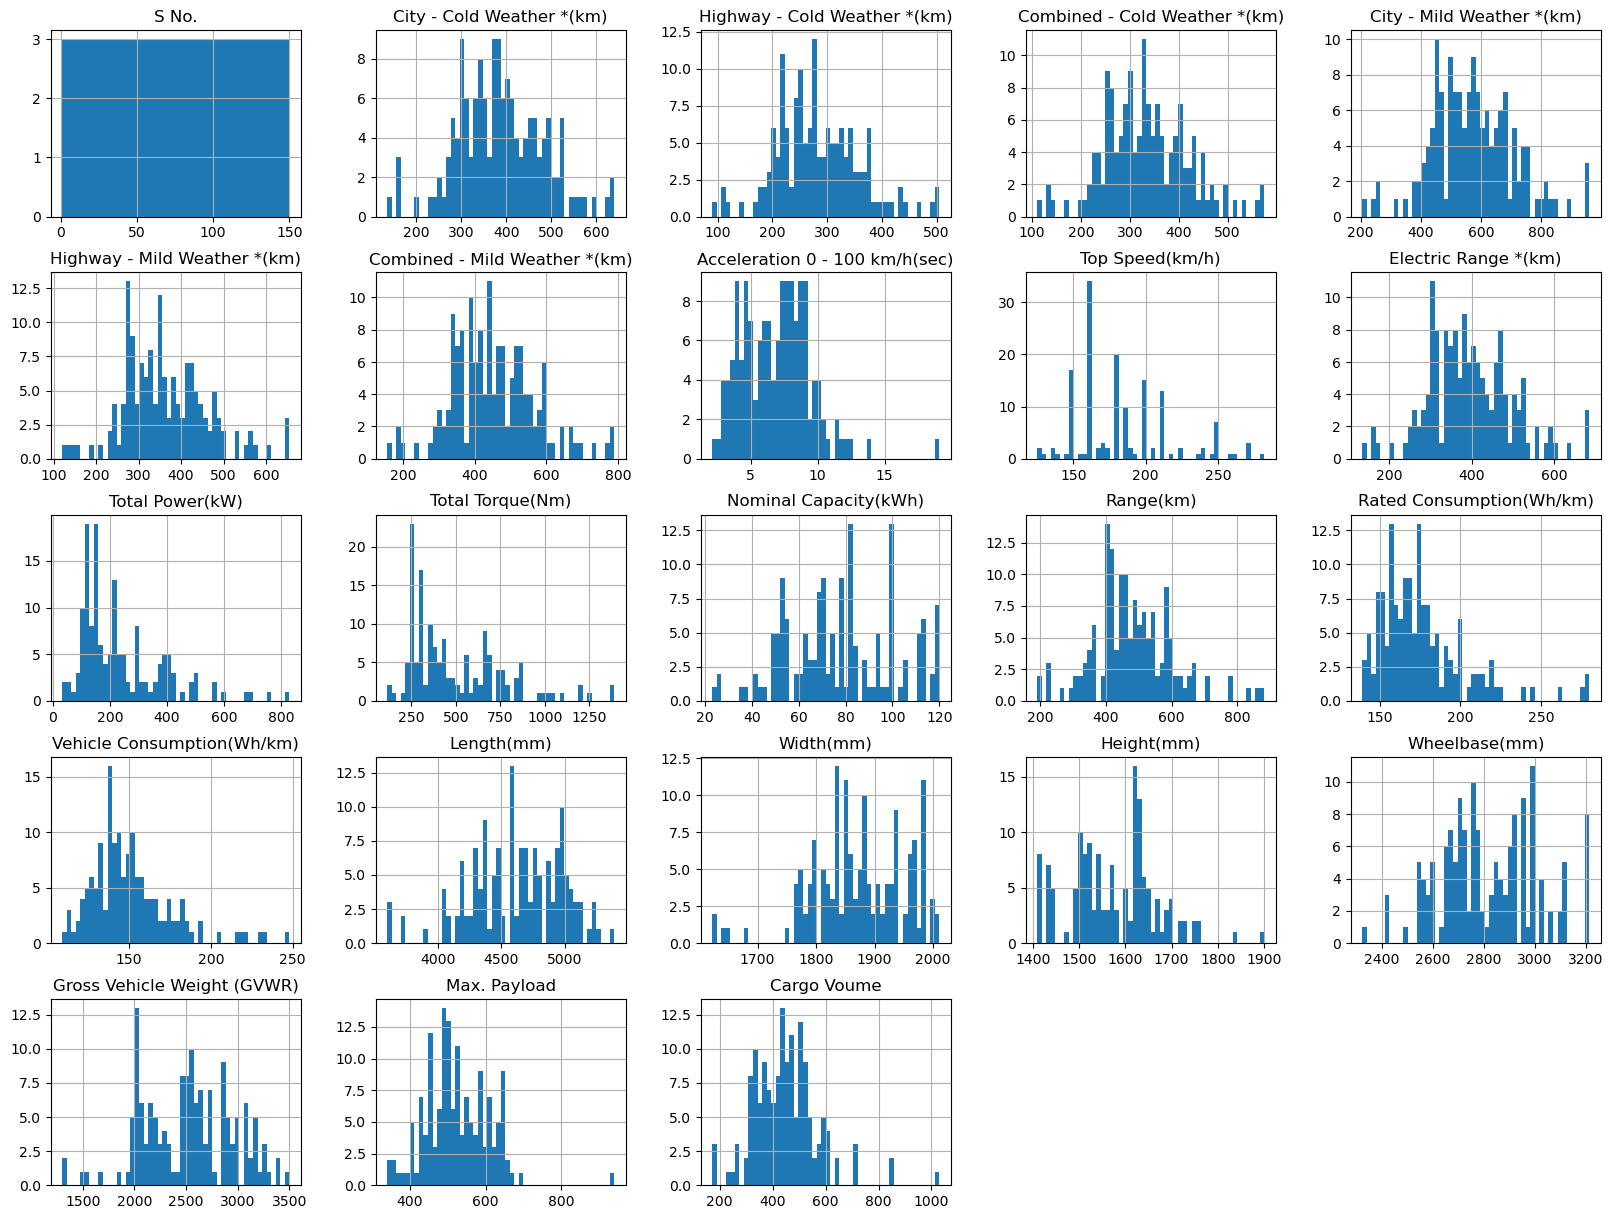

In [7]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

#### Below chart shows the total no. of vehicles segregated on the basis of Drive

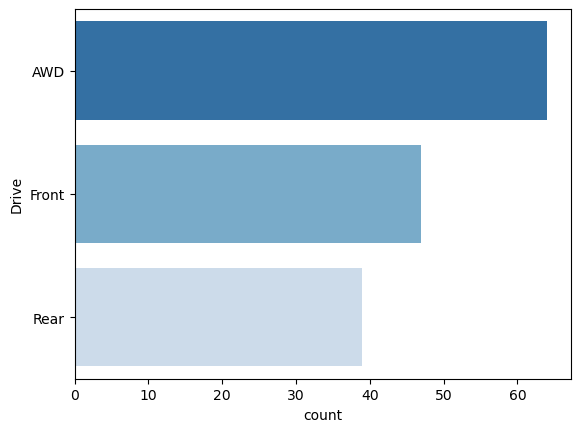

In [8]:
sns.countplot(y="Drive", 
              data=df,
              label="number of cars by Drive",
              palette='Blues_r',
              order=df['Drive'].value_counts().index)
plt.show()

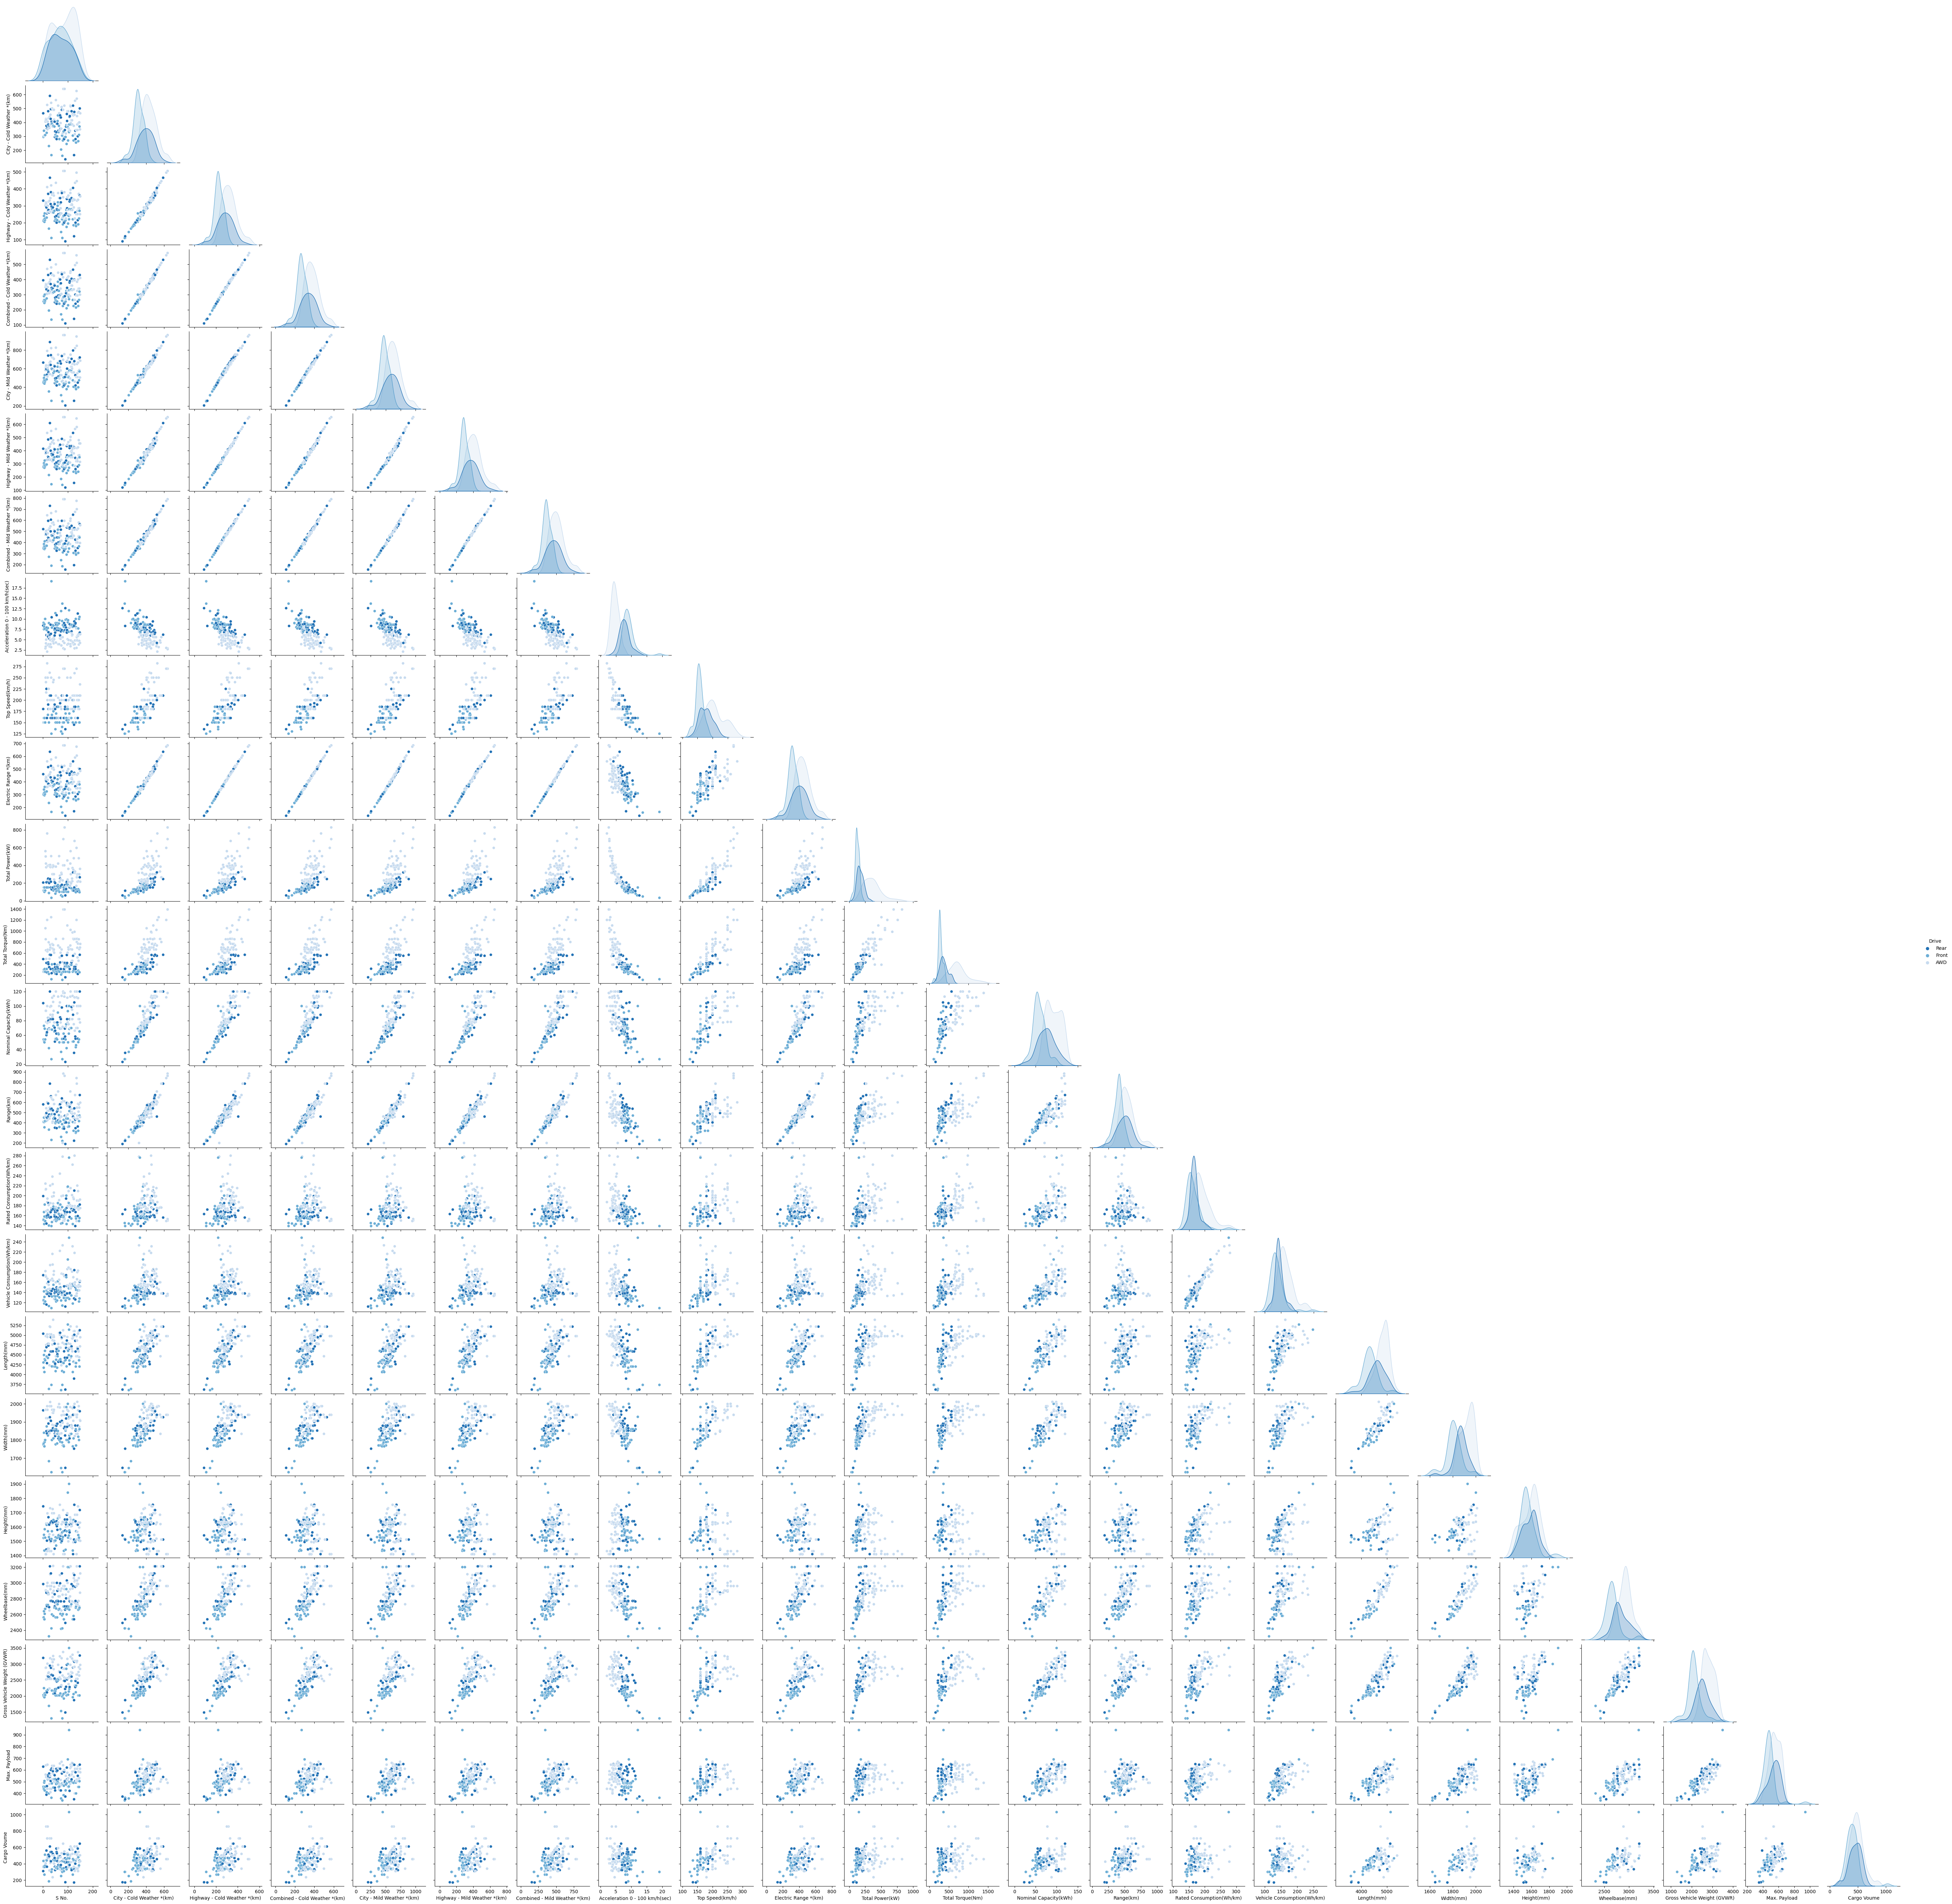

In [9]:
sns.pairplot(df,
             corner=True,
             kind='scatter',
             palette='Blues_r',
             hue='Drive')
plt.show()

#### Chart below shows total no. of EV Vehicles beloging to different Brands 

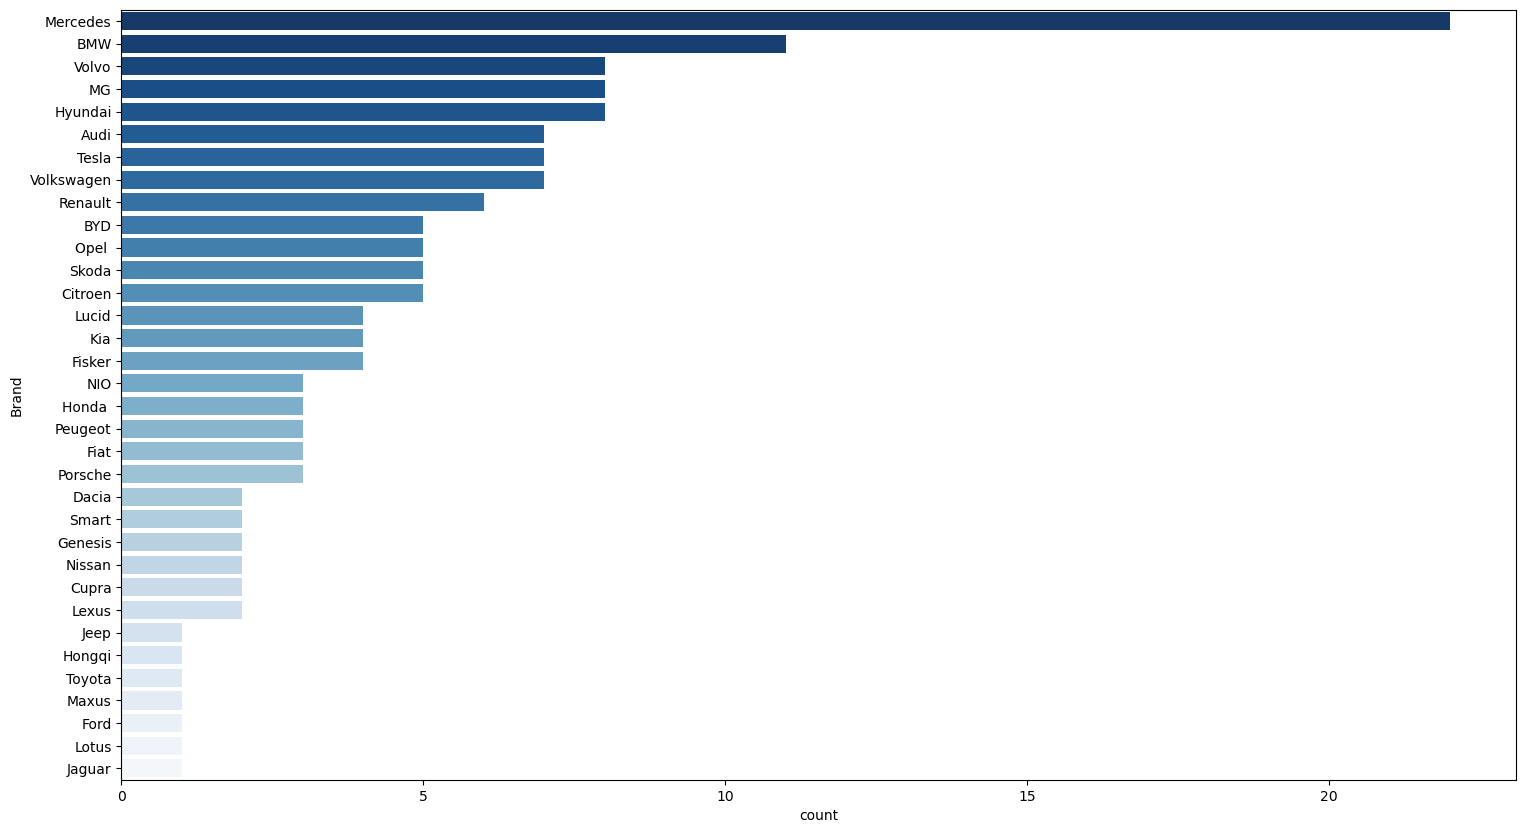

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(y="Brand", 
              data=df,
              label="Number of Cars by Brand",
              palette='Blues_r',
              order=df['Brand'].value_counts().index)
plt.show()

#### Below is the ploting between the range observed in cold weather in city, highway and combined

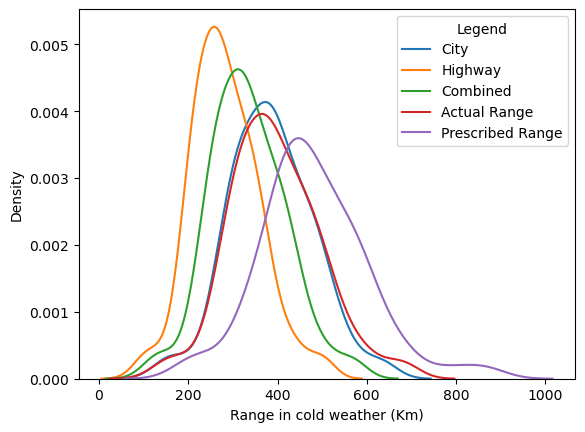

In [11]:
chart = sns.distplot(df[['City - Cold Weather *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Highway - Cold Weather *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Combined - Cold Weather *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Electric Range *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Range(km)']], hist=False, rug=False)

chart.set(xlabel = 'Range in cold weather (Km)')

plt.legend(title='Legend', loc='upper right', labels=['City', 'Highway', 'Combined', 'Actual Range','Prescribed Range'])
plt.show()

#### Below is the ploting between the range observed in mild weather in city, highway and combined

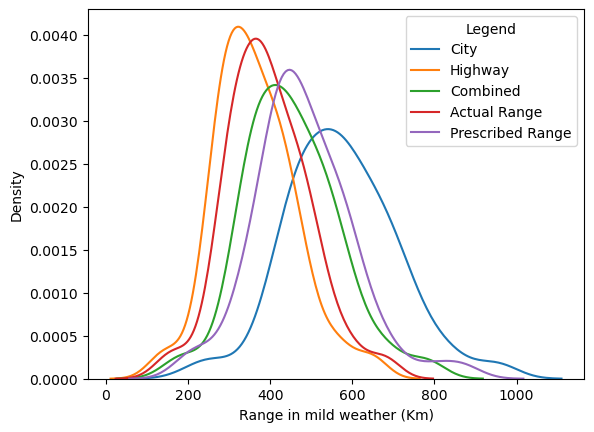

In [12]:
chart = sns.distplot(df[['City - Mild Weather *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Highway - Mild Weather *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Combined - Mild Weather *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Electric Range *(km)']], hist=False, rug=False)
chart = sns.distplot(df[['Range(km)']], hist=False, rug=False)

chart.set(xlabel = 'Range in mild weather (Km)')

plt.legend(title='Legend', loc='upper right', labels=['City', 'Highway', 'Combined', 'Actual Range','Prescribed Range'])
plt.show()

In [9]:
df['City Mild to Actual Range'] = df['City - Mild Weather *(km)']/df['Electric Range *(km)']
df['City Cold to Actual Range'] = df['City - Cold Weather *(km)']/df['Electric Range *(km)']
df['City Mild to Prescribed Range'] = df['City - Mild Weather *(km)']/df['Range(km)']
df['City Cold to Prescribed Range'] = df['City - Cold Weather *(km)']/df['Range(km)']

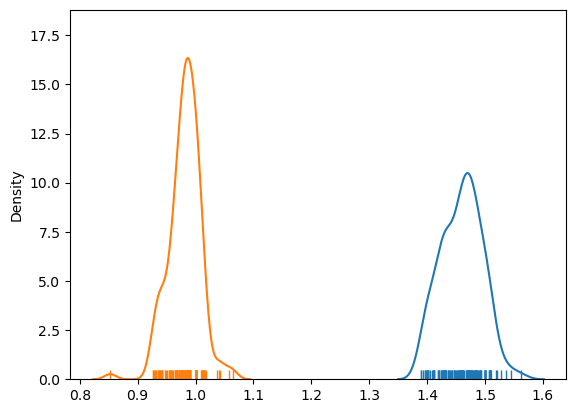

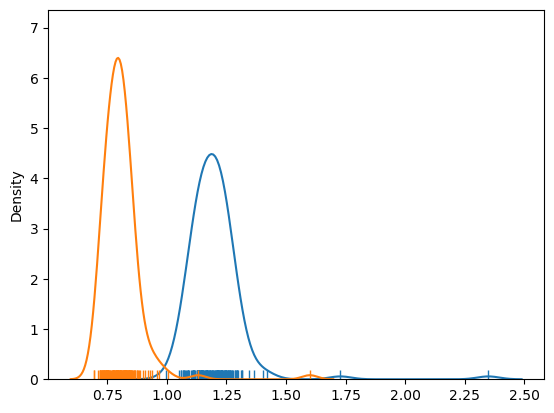

In [10]:
sns.distplot(df[['City Mild to Actual Range']], hist=False, rug=True)
sns.distplot(df[['City Cold to Actual Range']], hist=False, rug=True)
plt.show()
sns.distplot(df[['City Mild to Prescribed Range']], hist=False, rug=True)
sns.distplot(df[['City Cold to Prescribed Range']], hist=False, rug=True)
plt.show()

#### Actual / Prescribed Range vs City - Cold Weather

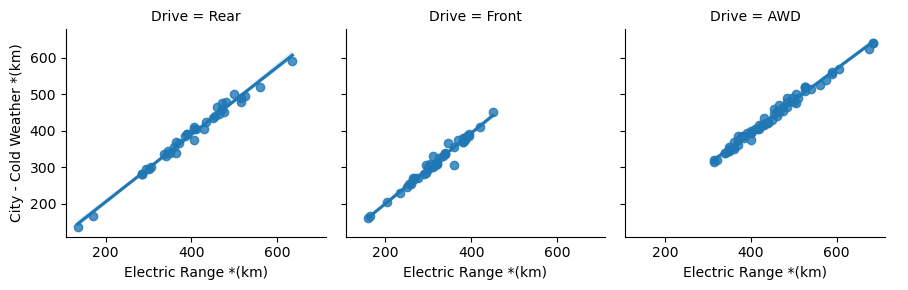

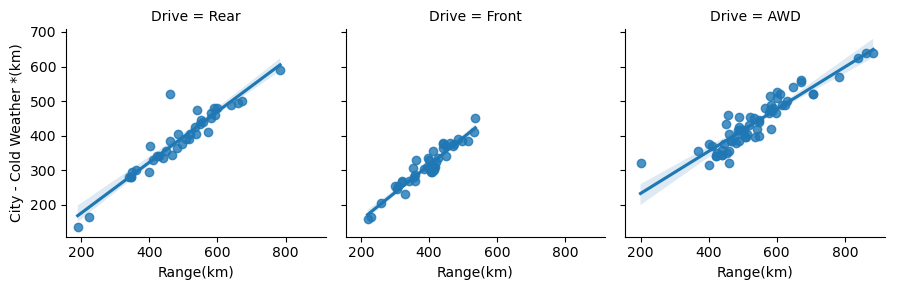

In [7]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="City - Cold Weather *(km)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="City - Cold Weather *(km)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs Highway - Cold Weather

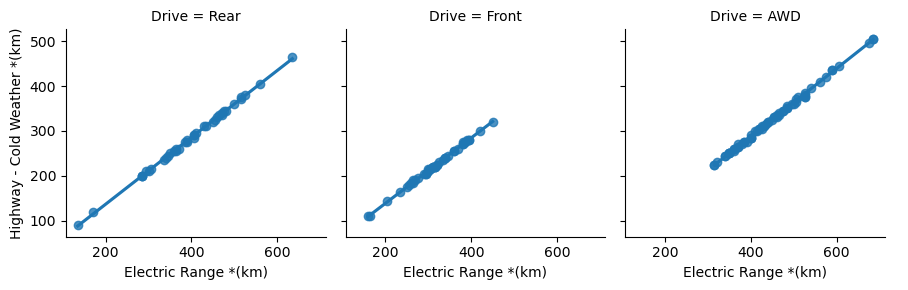

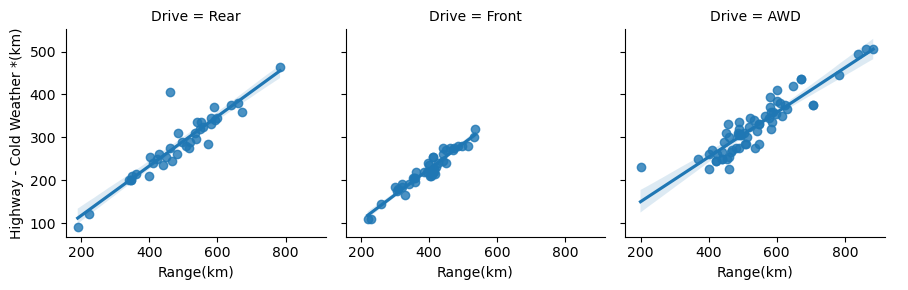

In [8]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="Highway - Cold Weather *(km)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="Highway - Cold Weather *(km)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs Combined - Cold Weather

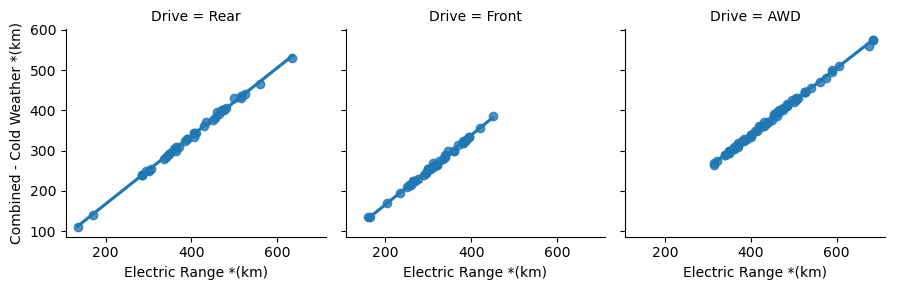

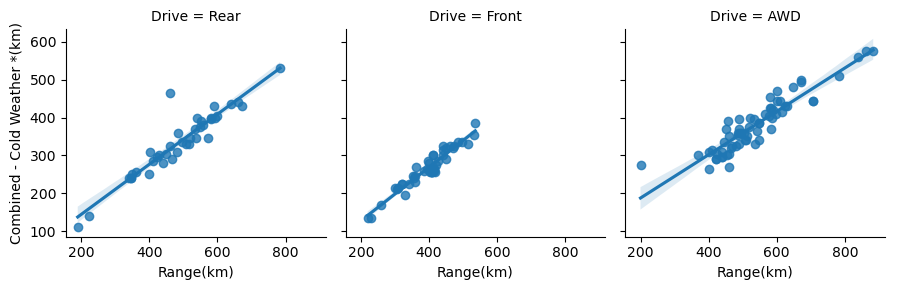

In [11]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="Combined - Cold Weather *(km)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="Combined - Cold Weather *(km)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs City - Mild Weather

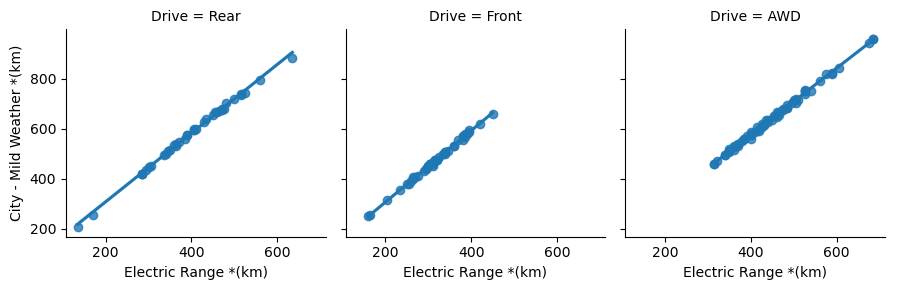

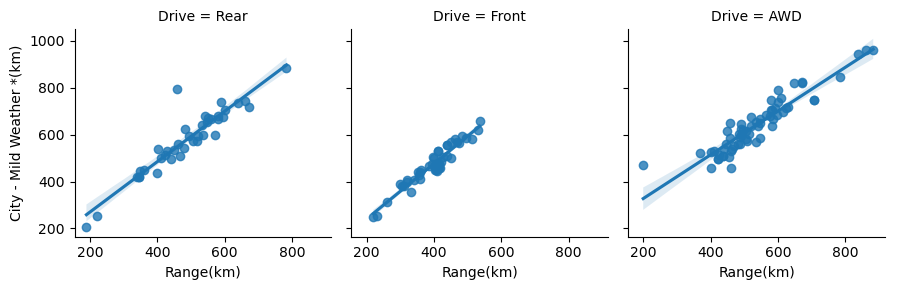

In [12]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="City - Mild Weather *(km)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="City - Mild Weather *(km)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs Highway - Mild Weather

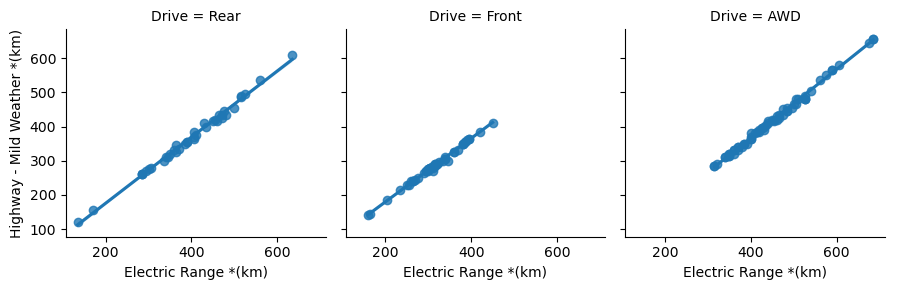

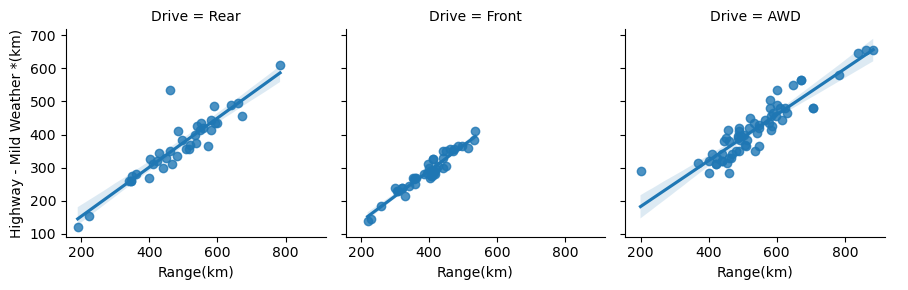

In [13]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="Highway - Mild Weather *(km)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="Highway - Mild Weather *(km)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs Combined - Mild Weather

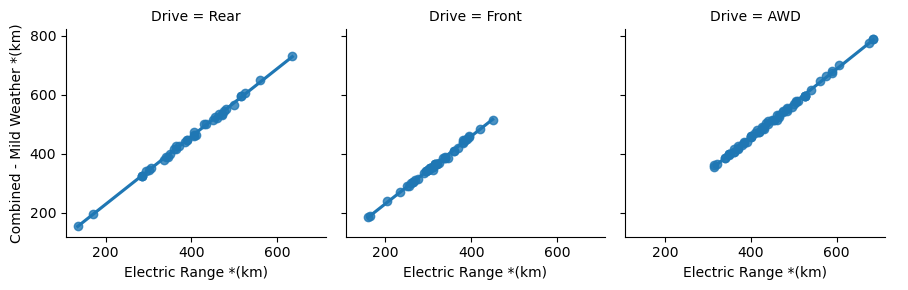

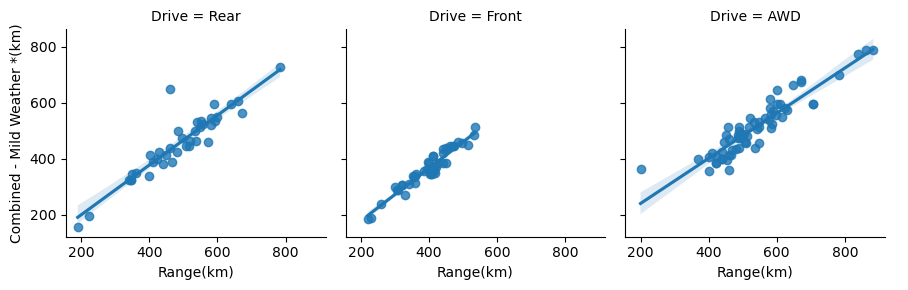

In [14]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="Combined - Mild Weather *(km)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="Combined - Mild Weather *(km)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs Nominal Capacity

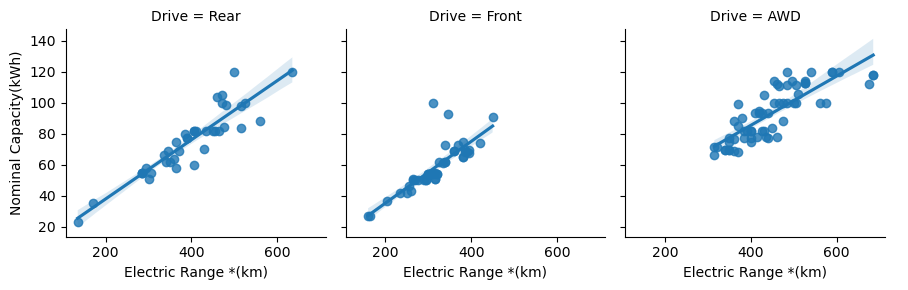

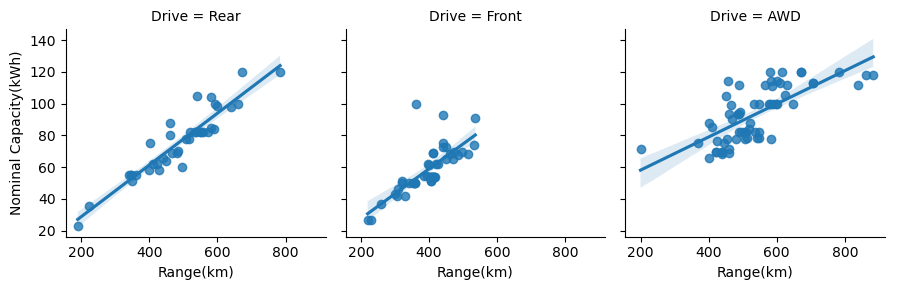

In [16]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="Nominal Capacity(kWh)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="Nominal Capacity(kWh)")
g.add_legend()
plt.show()

#### Actual / Prescribed Range vs Total Power

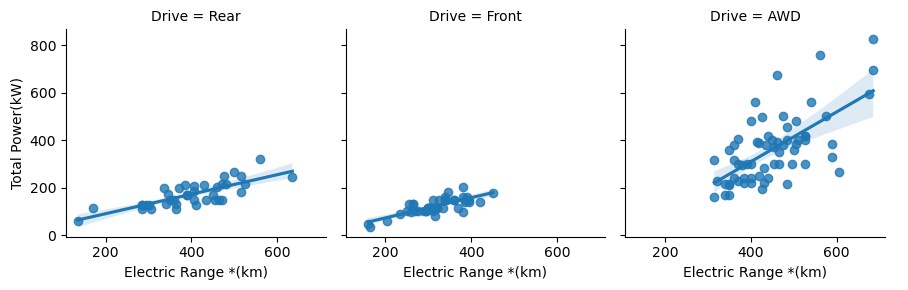

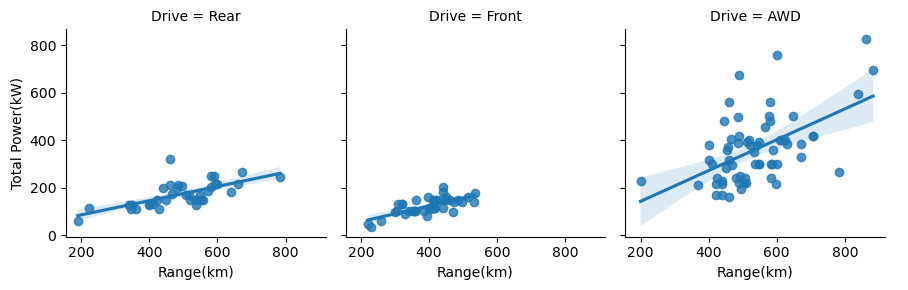

In [17]:
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Electric Range *(km)", y="Total Power(kW)")
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="Drive")
g.map_dataframe(sns.regplot, x="Range(km)", y="Total Power(kW)")
g.add_legend()
plt.show()

#### Bar chart below shows the actual range which the user is getting on their end through their Vehicle belonging to different brands

<Axes: xlabel='Electric Range *(km)', ylabel='Brand'>

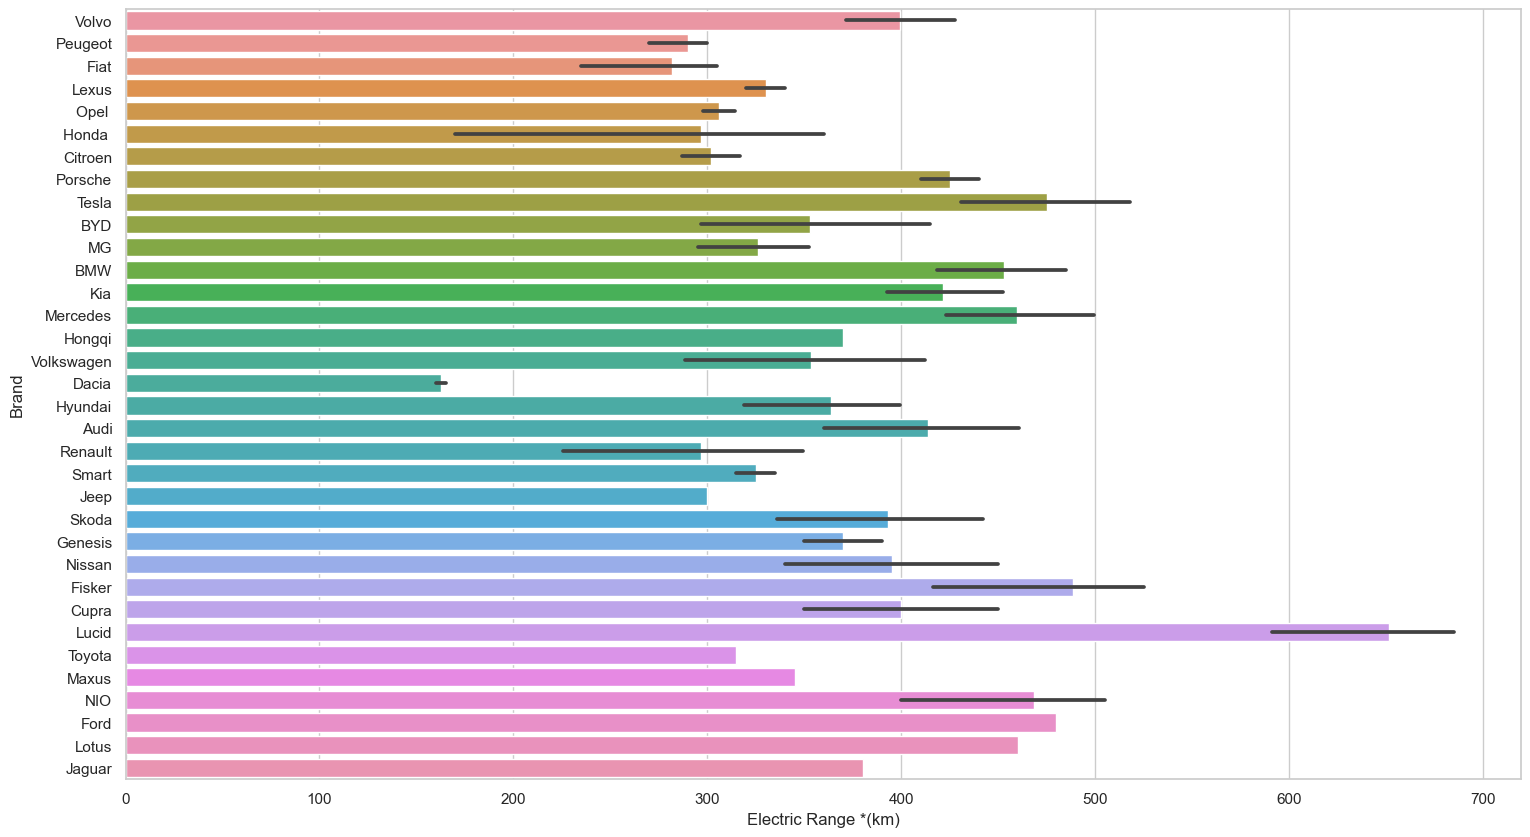

In [76]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="Electric Range *(km)", y="Brand")

#### Bar chart below shows the prescribed range which the company is prescribing on their end for their Vehicles.

<Axes: xlabel='Range(km)', ylabel='Brand'>

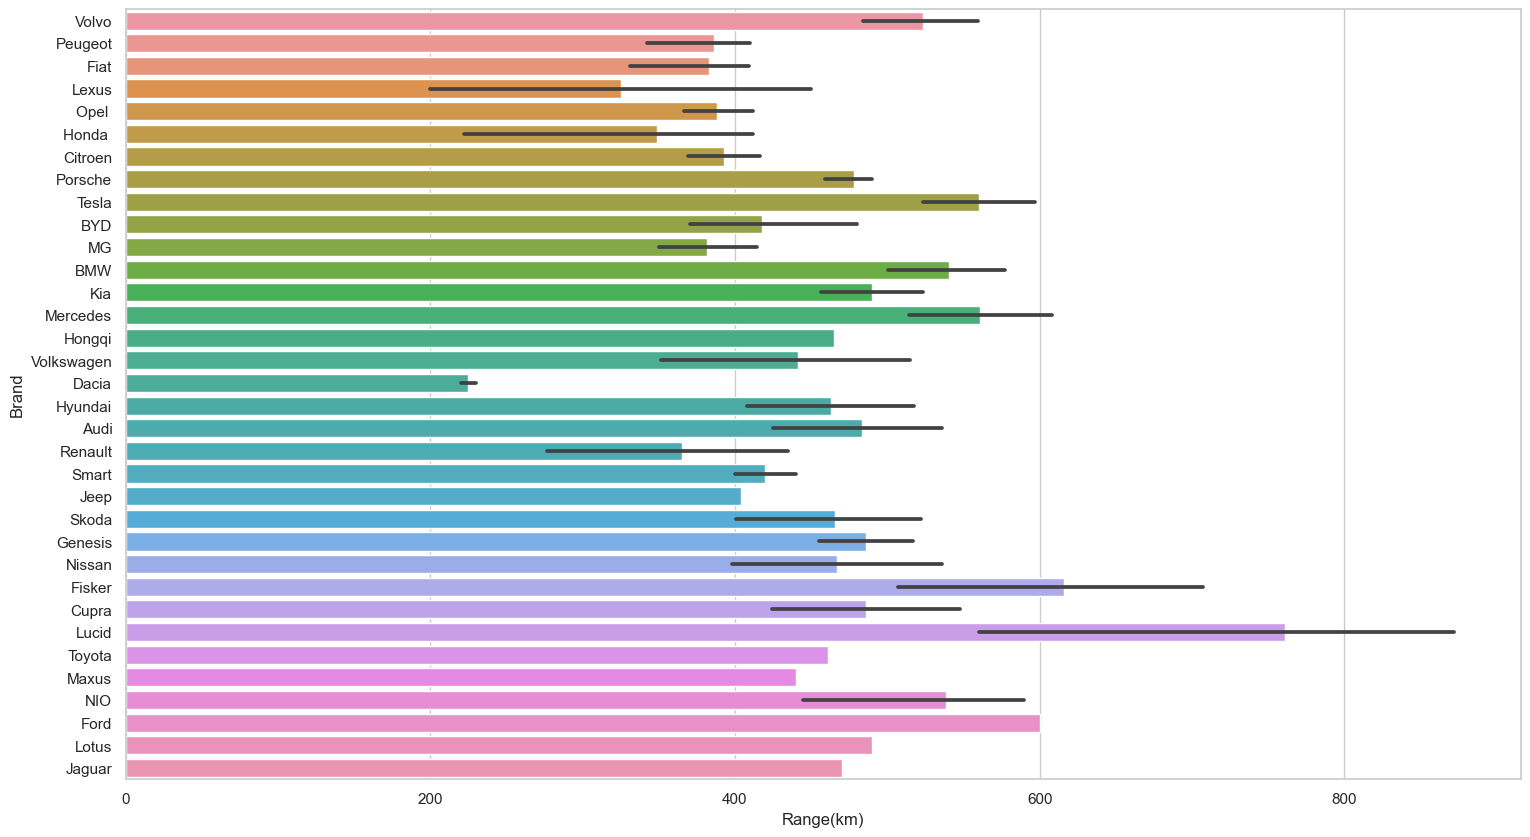

In [75]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="Range(km)", y="Brand")

In [12]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas.core.apply import frame_apply

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.tree._tree import Tree
import graphviz

In [13]:
X = df[['Acceleration 0 - 100 km/h(sec)', 
        'Top Speed(km/h)', 
        'Total Power(kW)', 
        'Total Torque(Nm)', 
        'Nominal Capacity(kWh)', 
        'Drive',
        'Rated Consumption(Wh/km)',
        'Vehicle Consumption(Wh/km)',
        'Length(mm)',  
        'Width(mm)', 
        'Height(mm)',
        'Wheelbase(mm)',
        'Gross Vehicle Weight (GVWR)', 
        'Max. Payload',
        'Cargo Voume']]
target = df[['City - Cold Weather *(km)',
        'Highway - Cold Weather *(km)',
        'Combined - Cold Weather *(km)',
        'City - Mild Weather *(km)',
        'Highway - Mild Weather *(km)',
        'Combined - Mild Weather *(km)',
        'Electric Range *(km)', 'S No.',
        'Range(km)',
        'Brand']]

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Acceleration 0 - 100 km/h(sec)  150 non-null    float64
 1   Top Speed(km/h)                 150 non-null    int64  
 2   Total Power(kW)                 150 non-null    int64  
 3   Total Torque(Nm)                150 non-null    int64  
 4   Nominal Capacity(kWh)           150 non-null    float64
 5   Drive                           150 non-null    object 
 6   Rated Consumption(Wh/km)        150 non-null    int64  
 7   Vehicle Consumption(Wh/km)      150 non-null    int64  
 8   Length(mm)                      150 non-null    int64  
 9   Width(mm)                       150 non-null    int64  
 10  Height(mm)                      150 non-null    int64  
 11  Wheelbase(mm)                   150 non-null    int64  
 12  Gross Vehicle Weight (GVWR)     150 

In [15]:
Y_ElectricRange = target[['Electric Range *(km)', 'S No.']]

In [16]:
ohe = OneHotEncoder(sparse=False)
drive_encoded = ohe.fit_transform(df[['Drive']])

In [17]:
drive_encoded = pd.DataFrame(drive_encoded, columns=ohe.get_feature_names_out())

In [18]:
drive_encoded.head()

Drive_AWD  Drive_Front  Drive_Rear
0        0.0          0.0         1.0
1        0.0          1.0         0.0
2        0.0          1.0         0.0
3        0.0          1.0         0.0
4        0.0          1.0         0.0

In [19]:
X = pd.concat([X.drop(['Drive'], axis=1), drive_encoded], axis=1)

In [20]:
X.head()

Acceleration 0 - 100 km/h(sec)  Top Speed(km/h)  Total Power(kW)  \
0                             8.4              180              205   
1                             9.1              150              115   
2                             9.0              150              115   
3                             7.5              160              150   
4                             8.1              150              115   

   Total Torque(Nm)  Nominal Capacity(kWh)  Rated Consumption(Wh/km)  \
0               490                  104.0                       199   
1               260                   54.0                       152   
2               260                   54.0                       151   
3               300                   72.8                       167   
4               260                   51.0                       143   

   Vehicle Consumption(Wh/km)  Length(mm)  Width(mm)  Height(mm)  \
0                         174        5037       1964        1744   
1                         125        4304       1775        1523   
2                         124        4171       1781        1523   
3                         142        4495       1840        1545   
4                         118        4061       1765        1435   

   Wheelbase(mm)  Gross Vehicle Weight (GVWR)  Max. Payload  Cargo Voume  \
0           2985                         3190           628          310   
1           2562                         2030           457          434   
2           2562                         1990           445          360   
3           2640                         2245           435          367   
4           2538                         1961           492          267   

   Drive_AWD  Drive_Front  Drive_Rear  
0        0.0          0.0         1.0  
1        0.0          1.0         0.0  
2        0.0          1.0         0.0  
3        0.0          1.0         0.0  
4        0.0          1.0         0.0

In [21]:
Y_ElectricRange.head()

Electric Range *(km)  S No.
0                   460      1
1                   300      2
2                   305      3
3                   340      4
4                   315      5

In [22]:
train_X, test_X, train_Y_ElectricRange, test_Y_ElectricRange = train_test_split(X,
                                                                                Y_ElectricRange,
                                                                                test_size = 0.25,
                                                                                random_state=0)

In [23]:
train_Y = train_Y_ElectricRange[['Electric Range *(km)']]
test_Y = test_Y_ElectricRange[['Electric Range *(km)']]

#### Decision Tree Regressor

In [24]:
#Hyperparameter tuning the Decision Tree Regressor with Grid Search
DTR_parameters = {'criterion':['squared_error','friedman_mse', 'absolute_error'],
                  'max_depth':[3,4,5,6,7,8,9,11],
                  'min_samples_leaf': [3,5,7,9,11,13]}

DTR_tune = GridSearchCV(estimator = DecisionTreeRegressor(random_state=0), 
                        param_grid = DTR_parameters,
                        scoring='neg_mean_absolute_error',
                        cv=7)

DTR_tune.fit(train_X, train_Y)
DTR_tune.best_params_, DTR_tune.best_score_

({'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_leaf': 5},
 -33.28125)

In [25]:
#Instantiate our Decision Tree Regressor and fit the model on the training data
DTR = DecisionTreeRegressor(**DTR_tune.best_params_, random_state=0)
DTR.fit(train_X,train_Y)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=5, random_state=0)

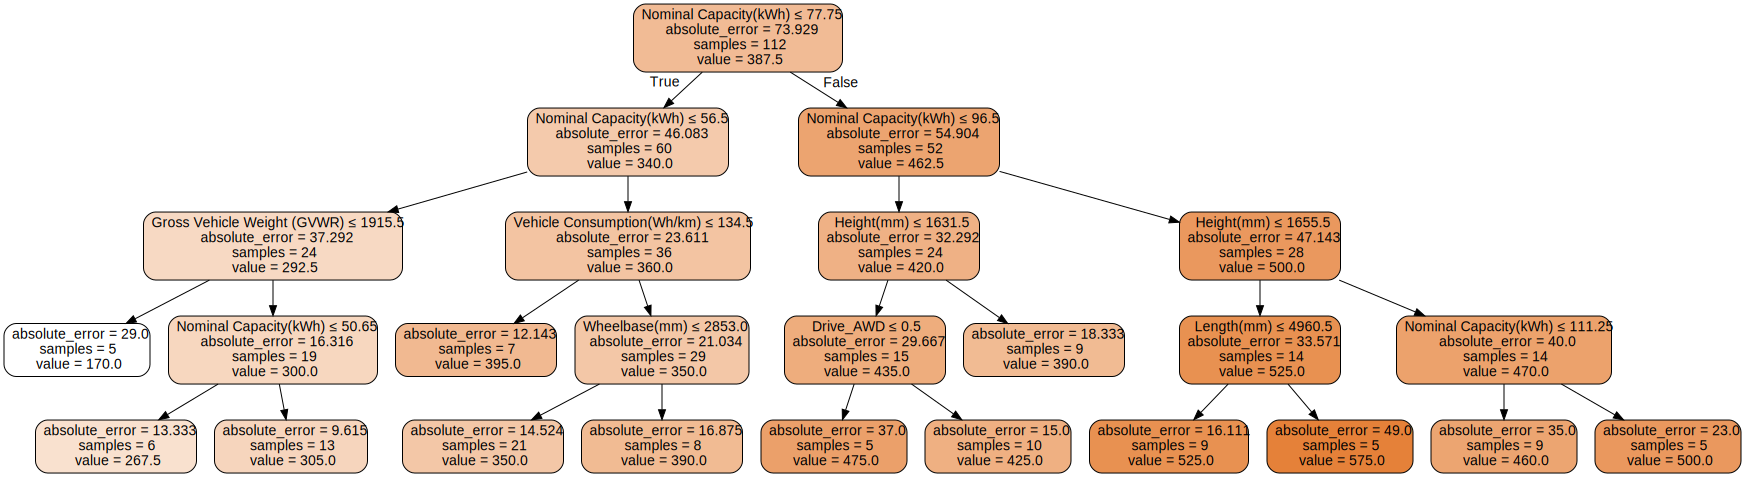

In [26]:
feature_names = list(train_X.columns)

d = tree.export_graphviz(DTR, 
                         out_file=None, 
                         feature_names=feature_names,  
                         filled=True, 
                         rounded=True,  
                         special_characters=True)

graph = graphviz.Source(d)
graph

In [27]:
print('Training Data Accuracy score: {0:.2%}'. format(DTR.score(train_X, train_Y)))

Training Data Accuracy score: 88.89%


In [28]:
print('Testing Data Accuracy score: {0:.2%}'. format(DTR.score(test_X, test_Y)))

Testing Data Accuracy score: 83.98%


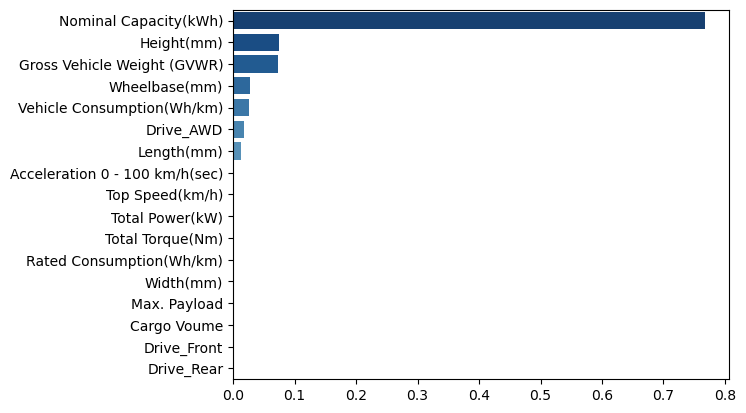

In [71]:
d = dict(sorted(dict(zip(train_X.columns, 
                         DTR.feature_importances_)).items(), 
                key=lambda item: item[1], 
                reverse=True))

sns.barplot(y=list(d.keys()), 
            x=list(d.values()),
            palette ='Blues_r')
plt.show()

In [29]:
Y_hat = pd.DataFrame(DTR.predict(test_X), columns=['Predicted Electric Range'])

In [30]:
predictions = pd.DataFrame()

In [31]:
test_Y_ElectricRange = test_Y_ElectricRange.reset_index()
test_X = test_X.reset_index()
predictions['S No.'] = test_Y_ElectricRange['S No.']
predictions['Electric Range *(km)'] = test_Y_ElectricRange['Electric Range *(km)']
predictions['DTR'] = Y_hat['Predicted Electric Range']

In [32]:
test_X = test_X.drop(['index'], axis=1)

#### Random Forest Regressor

In [95]:
#Hyperparameter tuning the Random Forest Regressor with Grid Search
RFR_parameters = {'criterion':['squared_error','poisson', 'absolute_error'],
                  'max_depth':[8,9,11,12,13],
                  'min_samples_leaf': [3,5,7,9]}

RFR_tune = GridSearchCV(estimator = RandomForestRegressor(random_state=0), 
                        param_grid = RFR_parameters,
                        scoring='r2',
                        cv=7)

RFR_tune.fit(train_X, train_Y)
RFR_tune.best_params_, RFR_tune.best_score_

({'criterion': 'poisson', 'max_depth': 9, 'min_samples_leaf': 3},
 0.7858616536387268)

In [96]:
#Instantiate our Random Forest Regressor and fit the model on the training data
RFR = RandomForestRegressor(**RFR_tune.best_params_, random_state=0)
RFR.fit(train_X,train_Y)

RandomForestRegressor(criterion='poisson', max_depth=9, min_samples_leaf=3,
                      random_state=0)

In [97]:
print('Training Data Accuracy score: {0:.2%}'. format(RFR.score(train_X, train_Y)))

Training Data Accuracy score: 95.16%


In [98]:
print('Testing Data Accuracy score: {0:.2%}'. format(RFR.score(test_X, test_Y)))

Testing Data Accuracy score: 90.54%


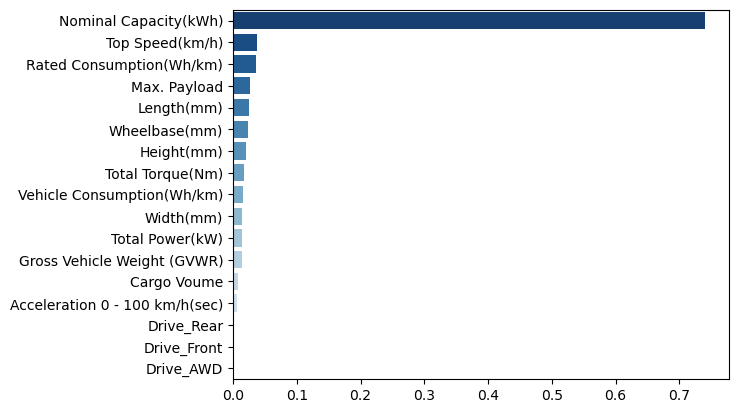

In [34]:
d = dict(sorted(dict(zip(train_X.columns, 
                         RFR.feature_importances_)).items(), 
                key=lambda item: item[1], 
                reverse=True))

sns.barplot(y=list(d.keys()), 
            x=list(d.values()),
            palette ='Blues_r')
plt.show()

In [28]:
predictions['RFR'] = pd.DataFrame(RFR.predict(test_X), columns=['Predicted Electric Range'])['Predicted Electric Range']

#### Linear Regression

In [33]:
LR = sm.OLS(train_Y, train_X.drop(['Drive_AWD', 'Drive_Rear','Drive_Front', 'Total Torque(Nm)', 'Rated Consumption(Wh/km)', 'Vehicle Consumption(Wh/km)', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Wheelbase(mm)', 'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Voume' ], axis=1))

In [34]:
LR_results = LR.fit()

In [35]:
print(LR_results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Electric Range *(km)   R-squared (uncentered):                   0.989
Model:                              OLS   Adj. R-squared (uncentered):              0.989
Method:                   Least Squares   F-statistic:                              2452.
Date:                  Mon, 24 Jul 2023   Prob (F-statistic):                   5.50e-105
Time:                          14:38:43   Log-Likelihood:                         -577.51
No. Observations:                   112   AIC:                                      1163.
Df Residuals:                       108   BIC:                                      1174.
Df Model:                             4                                                  
Covariance Type:              nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
-

In [36]:
print('Training Data MAPE: {0:.2%}'. format(mean_absolute_percentage_error(train_Y, LR_results.predict(train_X.drop(['Drive_AWD', 'Drive_Rear','Drive_Front', 'Total Torque(Nm)', 'Rated Consumption(Wh/km)', 'Vehicle Consumption(Wh/km)', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Wheelbase(mm)', 'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Voume'], axis=1)))))

Training Data MAPE: 8.42%


In [37]:
print('Testing Data MAPE: {0:.2%}'. format(mean_absolute_percentage_error(test_Y, LR_results.predict(test_X.drop(['Drive_AWD', 'Drive_Rear','Drive_Front', 'Total Torque(Nm)', 'Rated Consumption(Wh/km)', 'Vehicle Consumption(Wh/km)', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Wheelbase(mm)', 'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Voume'], axis=1)))))

Testing Data MAPE: 8.03%


In [38]:
LR_final = LinearRegression()

In [39]:
LR_final.fit(train_X.drop(['Drive_AWD', 'Drive_Rear','Drive_Front', 'Total Torque(Nm)', 'Rated Consumption(Wh/km)', 'Vehicle Consumption(Wh/km)', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Wheelbase(mm)', 'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Voume'], axis=1), train_Y)

LinearRegression()

In [40]:
predictions['LR'] = LR_results.predict(test_X.drop(['Drive_AWD', 'Drive_Rear','Drive_Front', 'Total Torque(Nm)', 'Rated Consumption(Wh/km)', 'Vehicle Consumption(Wh/km)', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Wheelbase(mm)', 'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Voume'], axis=1))

#### Gradient Boosting Regressor

In [37]:
#Hyperparameter tuning the Gradient Boosting Regressor with Grid Search
GBR_parameters = {'loss':['squared_error','huber', 'absolute_error'],
                  'learning_rate':[.001,0.01,0.1],
                  'n_estimators': [250,500,1000,2000],
                  'criterion': ['friedman_mse', 'squared_error', 'mse']}

GBR_tune = GridSearchCV(estimator = GradientBoostingRegressor(random_state=0), 
                        param_grid = GBR_parameters,
                        scoring='r2',
                        cv=7)

GBR_tune.fit(train_X, train_Y)
GBR_tune.best_params_, GBR_tune.best_score_

({'criterion': 'squared_error',
  'learning_rate': 0.1,
  'loss': 'absolute_error',
  'n_estimators': 2000},
 0.8758060787247814)

In [38]:
#Instantiate our Gradient Boosting Regressor and fit the model on the training data
GBR = GradientBoostingRegressor(**GBR_tune.best_params_, random_state=0)
GBR.fit(train_X,train_Y)

GradientBoostingRegressor(criterion='squared_error', loss='absolute_error',
                          n_estimators=2000, random_state=0)

In [39]:
print('Training Data Accuracy score: {0:.2%}'. format(GBR.score(train_X, train_Y)))

Training Data Accuracy score: 99.23%


In [40]:
print('Testing Data Accuracy score: {0:.2%}'. format(GBR.score(test_X, test_Y)))

Testing Data Accuracy score: 94.18%


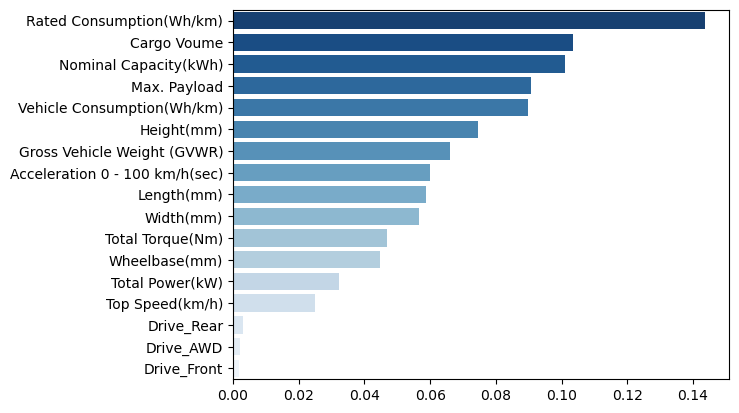

In [41]:
d = dict(sorted(dict(zip(train_X.columns, 
                         GBR.feature_importances_)).items(), 
                key=lambda item: item[1], 
                reverse=True))

sns.barplot(y=list(d.keys()), 
            x=list(d.values()),
            palette ='Blues_r')
plt.show()

In [41]:
predictions['GBR'] = pd.DataFrame(GBR.predict(test_X), columns=['Predicted Electric Range'])['Predicted Electric Range']

#### Ensemble Voting Regressor

In [42]:
VR = VotingRegressor([('DTR', DTR), ('RFR', RFR), ('LR', LR_final), ('GBR', GBR)])

In [43]:
VR = VR.fit(train_X, train_Y)

In [44]:
predictions['VR'] = VR.predict(test_X)

In [45]:
print('Training Data Accuracy score: {0:.2%}'. format(VR.score(train_X, train_Y)))

Training Data Accuracy score: 97.05%


In [46]:
print('Testing Data Accuracy score: {0:.2%}'. format(VR.score(test_X, test_Y)))

Testing Data Accuracy score: 95.31%


In [47]:
predictions.head(50)

S No.  Electric Range *(km)    DTR         RFR          LR         GBR  \
0     115                   480  525.0  448.079164  457.485443  425.426739   
1      63                   335  350.0  354.469156  345.121779  321.555867   
2      34                   165  170.0  187.975759  182.337474  163.046146   
3     108                   465  475.0  420.178557  389.514670  422.551643   
4       8                   305  305.0  308.128532  291.237229  309.458410   
5     101                   275  267.5  287.145620  279.285383  285.053544   
6      41                   510  575.0  487.547691  520.168418  485.742395   
7      87                   685  575.0  584.562688  558.695347  677.224335   
8      77                   310  305.0  285.739390  286.275506  295.797401   
9      72                   450  475.0  433.069005  388.995414  422.469589   
10    135                   675  575.0  572.245644  554.050609  649.772670   
11     52                   590  525.0  545.754711  542.680262  501.628706   
12     74                   360  350.0  370.844592  355.533277  378.600467   
13     55                   285  305.0  292.962613  302.941789  284.215371   
14     64                   385  350.0  360.122356  349.880573  356.398369   
15     38                   370  425.0  385.986952  408.104721  357.885585   
16     79                   320  350.0  352.188849  351.082341  350.756267   
17     91                   300  305.0  300.618339  308.253410  312.194450   
18     46                   380  395.0  371.821883  333.909472  387.705770   
19     17                   560  575.0  529.234735  514.751034  575.844923   
20    122                   465  575.0  492.273222  479.656859  501.452114   
21     67                   340  350.0  346.575233  346.229344  340.430898   
22     25                   370  395.0  372.854309  362.263205  381.999514   
23      9                   320  305.0  309.160198  291.237229  313.053542   
24    127                   460  575.0  476.803353  540.535966  477.227623   
25     23                   450  425.0  478.177513  436.606652  468.367119   
26     45                   440  395.0  417.252211  391.487481  475.302279   
27     98                   485  500.0  492.232540  544.405593  487.148059   
28     94                   380  390.0  366.948696  363.646531  366.100568   
29     27                   460  425.0  457.745334  448.850895  512.289175   
30    138                   380  425.0  418.753247  441.899001  383.101511   
31     85                   285  305.0  289.531224  302.776771  287.187719   
32     28                   635  575.0  536.926565  550.951841  600.384951   
33    128                   315  350.0  355.665649  345.590487  337.348627   
34    133                   255  267.5  250.047341  273.502512  272.600492   
35     60                   450  390.0  409.888865  417.605263  393.194124   
36     19                   415  425.0  421.968714  439.357528  433.444072   
37     84                   295  267.5  285.218148  280.027269  288.465832   

            VR  
0   470.565380  
1   340.803928  
2   170.200793  
3   437.552192  
4   315.245595  
5   289.786217  
6   514.767472  
7   619.278948  
8   290.494686  
9   442.845800  
10  604.293087  
11  535.907028  
12  365.053473  
13  291.758561  
14  356.251468  
15  379.245441  
16  322.421001  
17  305.879144  
18  377.863183  
19  552.382785  
20  511.341460  
21  343.549472  
22  382.715503  
23  311.453176  
24  488.595013  
25  451.890552  
26  432.148324  
27  489.307483  
28  367.279038  
29  460.874272  
30  406.444298  
31  294.074351  
32  589.043351  
33  338.665882  
34  261.265635  
35  405.616549  
36  419.282091  
37  286.429195

In [49]:
def find_closest_min_max(row):
    actual_range = row['Electric Range *(km)']
    estimated_range_values = row.drop(['S No.', 'Electric Range *(km)']).values
    closest_min = min(estimated_range_values, key=lambda x: x - actual_range if x >= actual_range else float('inf'))
    closest_max = min(estimated_range_values, key=lambda x: actual_range - x if x <= actual_range else float('inf'))
    return closest_min, closest_max

# Create new columns for closest min and max values
predictions['Closest Min'] = predictions.apply(lambda row: find_closest_min_max(row)[0], axis=1)
predictions['Closest Max'] = predictions.apply(lambda row: find_closest_min_max(row)[1], axis=1)


In [50]:
predictions.head(50)

S No.  Electric Range *(km)    DTR         RFR          LR         GBR  \
0     115                   480  525.0  448.079164  457.485443  425.426739   
1      63                   335  350.0  354.469156  345.121779  321.555867   
2      34                   165  170.0  187.975759  182.337474  163.046146   
3     108                   465  475.0  420.178557  389.514670  422.551643   
4       8                   305  305.0  308.128532  291.237229  309.458410   
5     101                   275  267.5  287.145620  279.285383  285.053544   
6      41                   510  575.0  487.547691  520.168418  485.742395   
7      87                   685  575.0  584.562688  558.695347  677.224335   
8      77                   310  305.0  285.739390  286.275506  295.797401   
9      72                   450  475.0  433.069005  388.995414  422.469589   
10    135                   675  575.0  572.245644  554.050609  649.772670   
11     52                   590  525.0  545.754711  542.680262  501.628706   
12     74                   360  350.0  370.844592  355.533277  378.600467   
13     55                   285  305.0  292.962613  302.941789  284.215371   
14     64                   385  350.0  360.122356  349.880573  356.398369   
15     38                   370  425.0  385.986952  408.104721  357.885585   
16     79                   320  350.0  352.188849  351.082341  350.756267   
17     91                   300  305.0  300.618339  308.253410  312.194450   
18     46                   380  395.0  371.821883  333.909472  387.705770   
19     17                   560  575.0  529.234735  514.751034  575.844923   
20    122                   465  575.0  492.273222  479.656859  501.452114   
21     67                   340  350.0  346.575233  346.229344  340.430898   
22     25                   370  395.0  372.854309  362.263205  381.999514   
23      9                   320  305.0  309.160198  291.237229  313.053542   
24    127                   460  575.0  476.803353  540.535966  477.227623   
25     23                   450  425.0  478.177513  436.606652  468.367119   
26     45                   440  395.0  417.252211  391.487481  475.302279   
27     98                   485  500.0  492.232540  544.405593  487.148059   
28     94                   380  390.0  366.948696  363.646531  366.100568   
29     27                   460  425.0  457.745334  448.850895  512.289175   
30    138                   380  425.0  418.753247  441.899001  383.101511   
31     85                   285  305.0  289.531224  302.776771  287.187719   
32     28                   635  575.0  536.926565  550.951841  600.384951   
33    128                   315  350.0  355.665649  345.590487  337.348627   
34    133                   255  267.5  250.047341  273.502512  272.600492   
35     60                   450  390.0  409.888865  417.605263  393.194124   
36     19                   415  425.0  421.968714  439.357528  433.444072   
37     84                   295  267.5  285.218148  280.027269  288.465832   

            VR  Closest Min  Closest Max  
0   470.565380   525.000000   470.565380  
1   340.803928   340.803928   321.555867  
2   170.200793   170.000000   163.046146  
3   437.552192   475.000000   437.552192  
4   315.245595   305.000000   305.000000  
5   289.786217   279.285383   267.500000  
6   514.767472   514.767472   487.547691  
7   619.278948   575.000000   677.224335  
8   290.494686   305.000000   305.000000  
9   442.845800   475.000000   442.845800  
10  604.293087   575.000000   649.772670  
11  535.907028   525.000000   545.754711  
12  365.053473   365.053473   355.533277  
13  291.758561   291.758561   284.215371  
14  356.251468   350.000000   360.122356  
15  379.245441   379.245441   357.885585  
16  322.421001   322.421001   350.000000  
17  305.879144   300.618339   305.000000  
18  377.863183   387.705770   377.863183  
19  552.382785   575.000000   552.382785  
20  511.341460   479.656859   575.000000  
21  343.549472 